<a href="https://colab.research.google.com/github/neeleshnayak/Rainfall-Prediction/blob/main/rain_fall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Rainfall Prediction is one of the difficult and uncertain tasks that have a significant impact on human society. Timely 
and accurate forecasting can proactively help reduce human and financial loss. 
This study presents a set of experiments that involve the use of common machine learning techniques to create models that can predict 
whether it will rain tomorrow or not based on the weather data for that day in major cities in Australia.

SyntaxError: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

# New Section

In [1]:
import pandas as pd

full_data = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [2]:
full_data.shape

(142193, 24)

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
# RainToday and RainTomorrow are objects (Yes / No). I will convert them to binary (1/0) for our convenience.

In [5]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

Text(0.5, 1.0, 'RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')

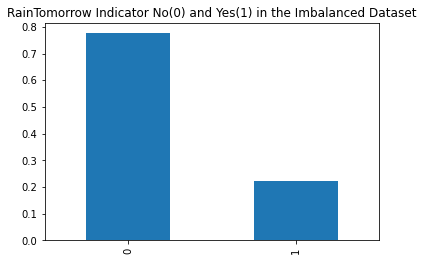

In [6]:
import matplotlib.pyplot as plt
full_data.RainTomorrow.value_counts(normalize = True).plot(kind = 'bar')
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')


In [7]:

# distribution is imbalanced with 78:22 thus, we are oversampling 1

In [8]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

Checking wether distribution is balanced after oversampling

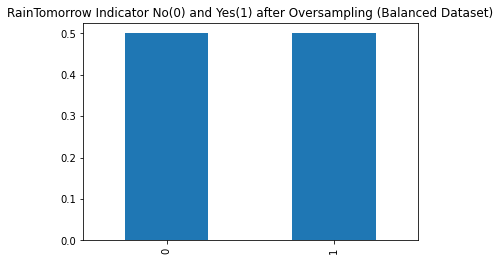

In [9]:
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar')
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [10]:
# Missing Data Pattern in Training Data
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (100*oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Sunshine,104831,47.513960
Evaporation,95411,43.244407
Cloud3pm,85614,38.803981
Cloud9am,81339,36.866366
Pressure3pm,21746,9.856231
Pressure9am,21728,9.848073
WindGustDir,15491,7.021194
WindGustSpeed,15354,6.959099
WindDir9am,14728,6.675369
WindDir3pm,6440,2.918888


we are deleting Sunshine,Evoporation, Cloud3pm and Cloud9AM as they have more than 30% of missing values


In [11]:
missings_handled = oversampled.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'], axis = 1)

In [12]:
missings_handled.shape #24 columns reduced to 20

(220632, 20)

Imputation and Transformation of other features

In [13]:
missings_handled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [14]:
# Impute categorical var with Mode
missings_handled['Date'] = missings_handled['Date'].fillna(missings_handled['Date'].mode()[0])
missings_handled['Location'] = missings_handled['Location'].fillna(missings_handled['Location'].mode()[0])
missings_handled['WindGustDir'] = missings_handled['WindGustDir'].fillna(missings_handled['WindGustDir'].mode()[0])
missings_handled['WindDir9am'] = missings_handled['WindDir9am'].fillna(missings_handled['WindDir9am'].mode()[0])
missings_handled['WindDir3pm'] = missings_handled['WindDir3pm'].fillna(missings_handled['WindDir3pm'].mode()[0])

In [15]:
missings_handled['WindGustDir'].nunique()

16

In [16]:
missings_handled['WindDir9am'].nunique()

16

In [17]:
missings_handled['Location'].nunique()

49

In [18]:
# Convert categorical features to continuous features with Label Encoding 
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in missings_handled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    missings_handled[col] = lencoders[col].fit_transform(oversampled[col])


In [19]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations to features whose misisng values are untreted
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = missings_handled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(missings_handled)

In [20]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800996
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [21]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(159846, 20)

We are now going to check multicollinearity, that is to say if a character is strongly correlated with another.

In [22]:
import seaborn as sns
corr = MiceImputed.corr()

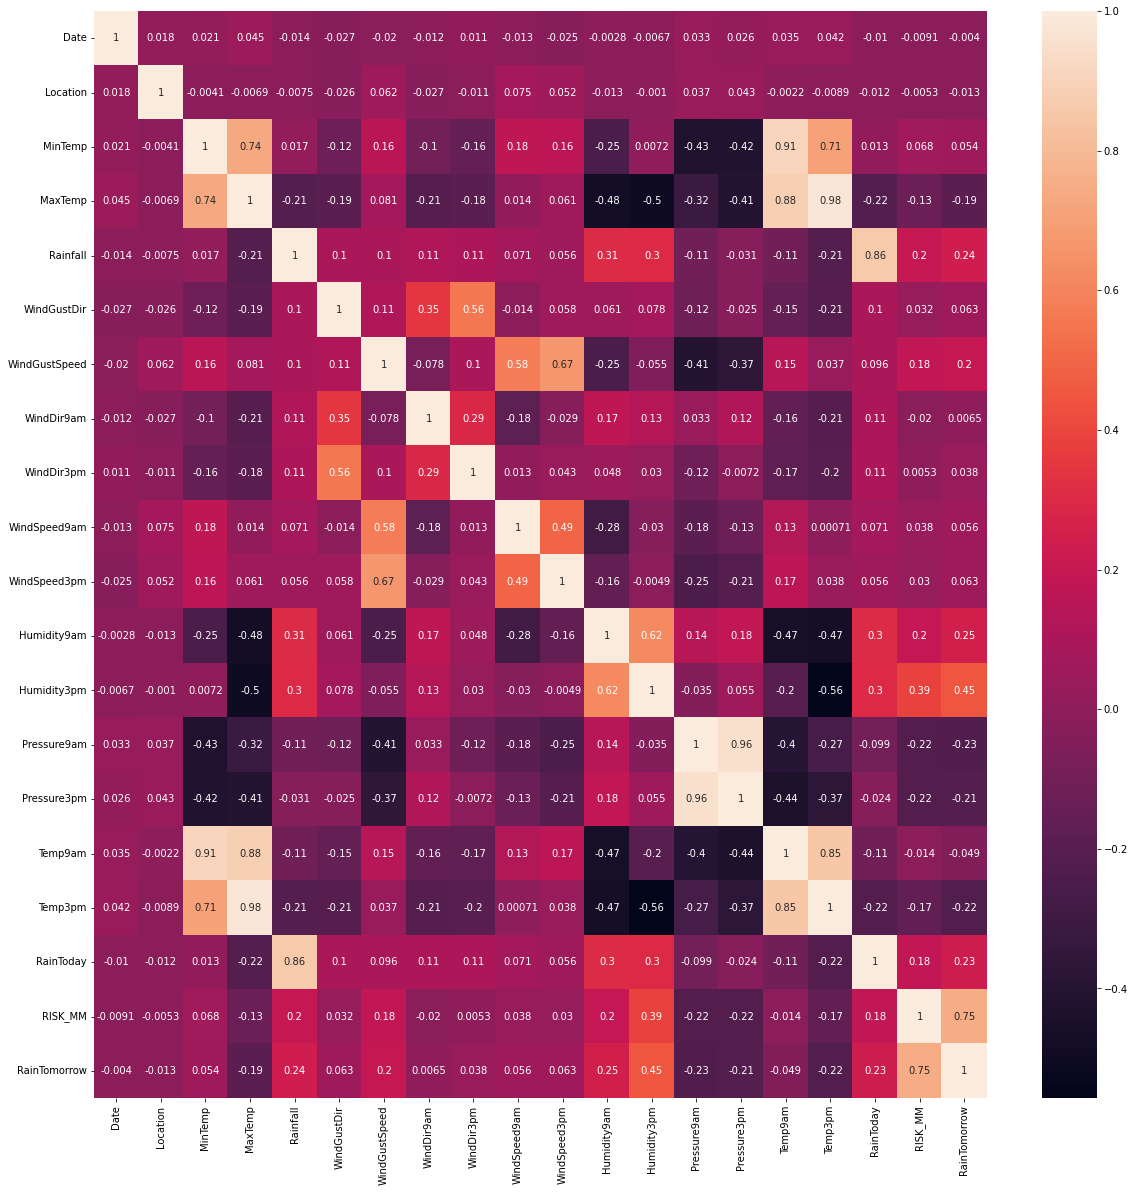

In [23]:
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, annot = True)


In [24]:
#The following feature pairs have a strong correlation with each other:

#MaxTemp and MinTemp ,Temp9am and Temp3pm and MaxTemp and Temp3pm

#Thus we are dropping features Maxtemp,Temp9am to address multicorriniality problem

In [25]:
corr_handled = MiceImputed.drop(['MaxTemp','Temp9am',], axis = 1)

In [26]:
corr_handled.shape


(159846, 18)

Feature Selection for Rainfall Prediction

In [27]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(corr_handled)
modified_data = pd.DataFrame(r_scaler.transform(corr_handled), index=corr_handled.index, columns=corr_handled.columns)

In [28]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'WindGustDir', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


In [29]:
#Rainfall', 'WindGustDir', 'WindGustSpeed', 'Humidity9am' have higher importance than others to impact in raining

Now lets use Random forest to do feature selection

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = corr_handled.drop('RainTomorrow', axis=1)
y = corr_handled['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Humidity3pm', 'RISK_MM']
[0.0016283  0.00147774 0.00301079 0.01346975 0.00136996 0.00768679
 0.00151407 0.00177466 0.00118689 0.00142877 0.00936512 0.06982289
 0.01080078 0.01178143 0.01104169 0.00868577 0.8439546 ]


Humidity and Risk_mm are prime features affecting raining according to random forest

Training Rainfall Prediction Model with Different Models

In [32]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [33]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [36]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
   
    time_taken = time.time()-t0
    print(f" use model is {model}")
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
 
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    
    
    return model, accuracy, roc_auc, time_taken

 use model is LogisticRegression(penalty='l1', solver='liblinear')
Accuracy = 1.0
ROC Area under Curve = 1.0
Time taken = 2.4438748359680176
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000     24497
         1.0    1.00000   1.00000   1.00000     15465

    accuracy                        1.00000     39962
   macro avg    1.00000   1.00000   1.00000     39962
weighted avg    1.00000   1.00000   1.00000     39962



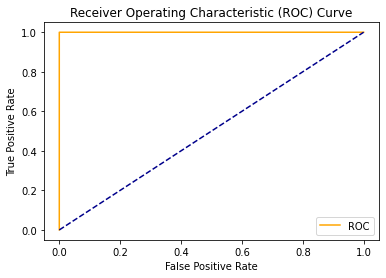

 use model is DecisionTreeClassifier(max_depth=5, max_features='sqrt')
Accuracy = 0.9846354036334518
ROC Area under Curve = 0.9808997086033127
Time taken = 0.09298419952392578
              precision    recall  f1-score   support

         0.0    0.97795   0.99743   0.98759     24497
         1.0    0.99579   0.96437   0.97983     15465

    accuracy                        0.98464     39962
   macro avg    0.98687   0.98090   0.98371     39962
weighted avg    0.98485   0.98464   0.98459     39962



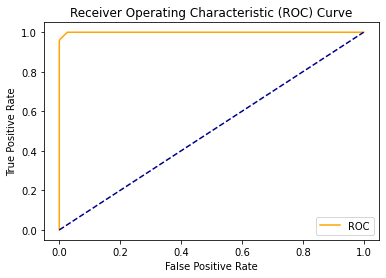

 use model is MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 30, 30),
              max_iter=500, solver='lbfgs')
Accuracy = 0.999974976227416
ROC Area under Curve = 0.9999795893374699
Time taken = 31.650633811950684
              precision    recall  f1-score   support

         0.0    1.00000   0.99996   0.99998     24497
         1.0    0.99994   1.00000   0.99997     15465

    accuracy                        0.99997     39962
   macro avg    0.99997   0.99998   0.99997     39962
weighted avg    0.99997   0.99997   0.99997     39962



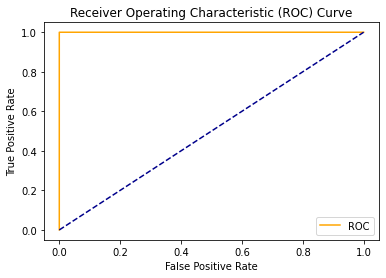

 use model is RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                       random_state=12345)
Accuracy = 1.0
ROC Area under Curve = 1.0
Time taken = 5.748759031295776
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000     24497
         1.0    1.00000   1.00000   1.00000     15465

    accuracy                        1.00000     39962
   macro avg    1.00000   1.00000   1.00000     39962
weighted avg    1.00000   1.00000   1.00000     39962



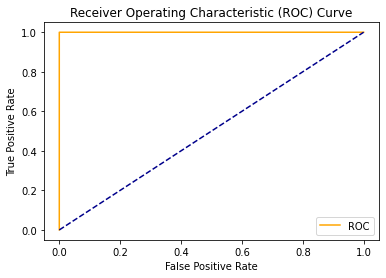

 use model is LGBMClassifier(colsample_bytree=0.95, max_depth=5, min_split_gain=0.1,
               num_leaves=50, reg_alpha=1.2, reg_lambda=1.2, subsample=0.95,
               subsample_freq=20)
Accuracy = 1.0
ROC Area under Curve = 1.0
Time taken = 1.1922636032104492
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000     24497
         1.0    1.00000   1.00000   1.00000     15465

    accuracy                        1.00000     39962
   macro avg    1.00000   1.00000   1.00000     39962
weighted avg    1.00000   1.00000   1.00000     39962



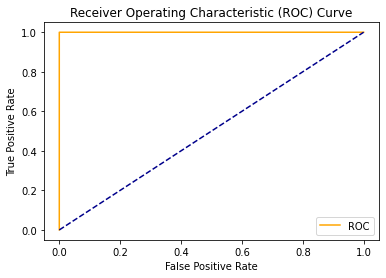

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
 use model is <catboost.core.CatBoostClassifier object at 0x7f52d33c76d0>
Accuracy = 1.0
ROC Area under Curve = 1.0
Time taken = 1.0607366561889648
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000     24497
         1.0    1.00000   1.00000   1.00000     15465

    accuracy                        1.00000     39962
   macro avg    1.00000   1.00000   1.00000     39962
weighted avg    1.00000   1.00000   1.00000     39962



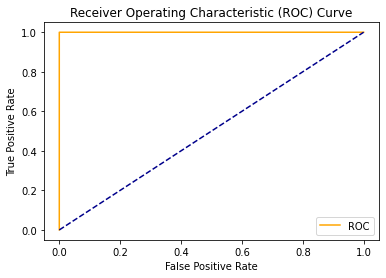

 use model is XGBClassifier(max_depth=5)
Accuracy = 1.0
ROC Area under Curve = 1.0
Time taken = 5.060401439666748
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000     24497
         1.0    1.00000   1.00000   1.00000     15465

    accuracy                        1.00000     39962
   macro avg    1.00000   1.00000   1.00000     39962
weighted avg    1.00000   1.00000   1.00000     39962



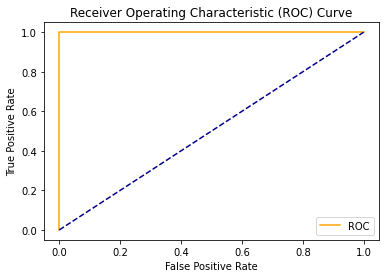

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr,  tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 5,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt,  tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 5,
             'min_samples_leaf': 10,
             'min_samples_split': 10,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf,  tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 5, 
         'min_split_gain': 0.1, 
         'n_estimators': 100, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb,  tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

# Catboost
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 5}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb,  tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 100,
            'max_depth': 5}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb,  tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

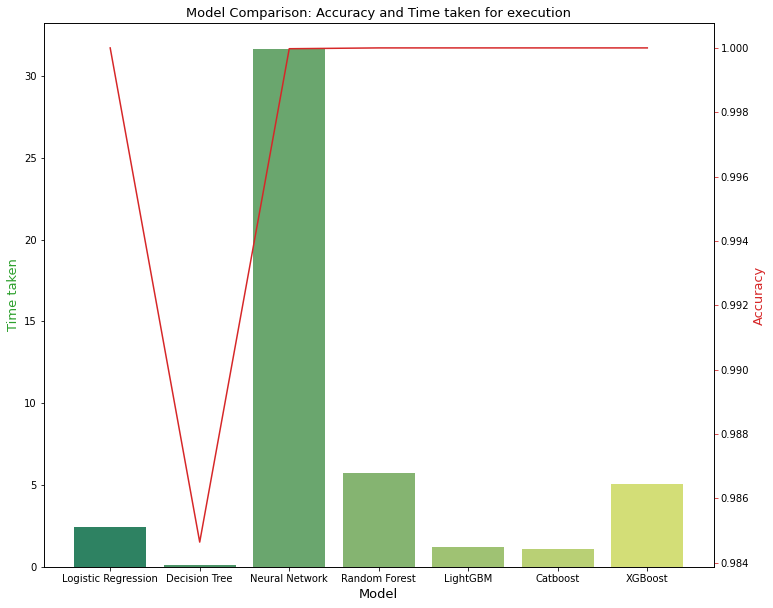

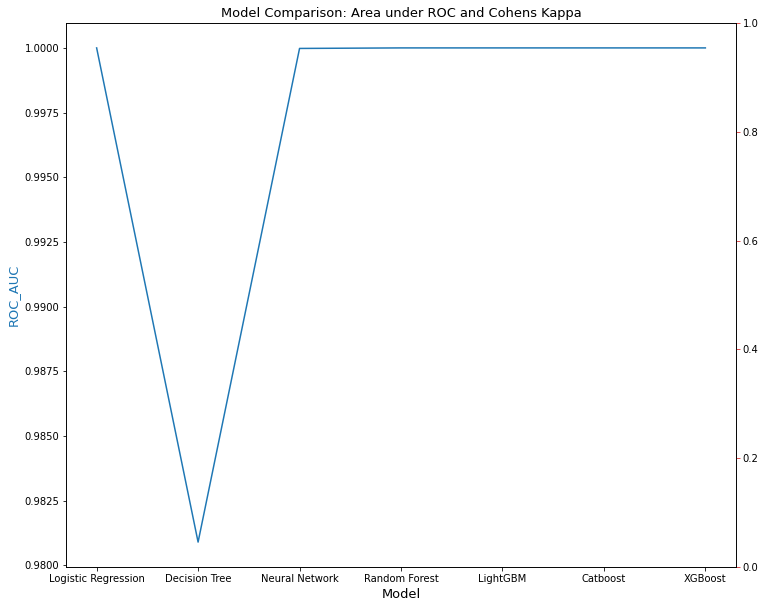

In [48]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]

tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)

ax5 = sns.lineplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'

ax4.tick_params(axis='y', color=color)
plt.show()

we can see, all models perform pretty well but comparing both time and efficiency random forest and xgboost perform better than other models